### 목표 : 부족한 피쳐를 조합 생성하여 모델 성능 향상
- 특성공학 => 피쳐 추출/선택/생성
- 비선형의 데이터에 대한 피쳐 생성  => 곡선형태의 회귀선 수식
- 모듈 : sklearn.preprocessing 내에 포함
- 데이터 : fish.csv
- 피쳐 : Perch의 Height, Length, Width
- 타겟 : Perch의 Weight
- 학습유형 : 지도학습

[1] 전처리 피쳐 조합 생성 살펴보기

In [2]:
# 모듈 로딩
from sklearn.preprocessing import PolynomialFeatures

In [3]:
# 인스턴스 생성
poly = PolynomialFeatures(include_bias=False, degree=5)


In [4]:
poly.fit([[2,3]])

PolynomialFeatures(degree=5, include_bias=False)

In [5]:
poly.transform([[2,3]])

array([[  2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.,  16.,  24.,
         36.,  54.,  81.,  32.,  48.,  72., 108., 162., 243.]])

In [6]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2',
       'x1^3', 'x0^4', 'x0^3 x1', 'x0^2 x1^2', 'x0 x1^3', 'x1^4', 'x0^5',
       'x0^4 x1', 'x0^3 x1^2', 'x0^2 x1^3', 'x0 x1^4', 'x1^5'],
      dtype=object)

[2] Perch 데이터를 최대한 만족하는 회귀선을 찾기


[2-1] 모듈로딩 및 데이터 준비 <hr>

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# 데이터 준비
data_file='../data/fish.csv'
dataDF = pd.read_csv(data_file)
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [9]:
# 불필요한 칼럼 제거
dataDF.drop('Diagonal', axis='columns', inplace=True)

In [10]:
dataDF.head(2)

,Species,Weight,Length,Height,Width
0,Bream,242.0,25.4,11.52,4.0200
1,Bream,290.0,26.3,12.48,4.3056


In [11]:
# Perch행만 추출
perchDF=dataDF[dataDF.Species == 'Perch']

In [12]:
# Species 칼럼 삭제
perchDF = perchDF.drop('Species', axis='columns').copy()

In [13]:
perchDF

,Weight,Length,Height,Width
72,5.9,8.4,2.1120,1.4080
73,32.0,13.7,3.5280,1.9992
74,40.0,15.0,3.8240,2.4320
75,51.5,16.2,4.5924,2.6316
76,70.0,17.4,4.5880,2.9415
77,100.0,18.0,5.2224,3.3216
78,78.0,18.7,5.1992,3.1234
79,80.0,19.0,5.6358,3.0502
80,85.0,19.6,5.1376,3.0368
81,85.0,20.0,5.0820,2.7720


In [14]:
perchDF.reset_index(drop=True, inplace=True)
perchDF

,Weight,Length,Height,Width
0,5.9,8.4,2.1120,1.4080
1,32.0,13.7,3.5280,1.9992
2,40.0,15.0,3.8240,2.4320
3,51.5,16.2,4.5924,2.6316
4,70.0,17.4,4.5880,2.9415
5,100.0,18.0,5.2224,3.3216
6,78.0,18.7,5.1992,3.1234
7,80.0,19.0,5.6358,3.0502
8,85.0,19.6,5.1376,3.0368
9,85.0,20.0,5.0820,2.7720


(2-2) 데이터 확인하기<hr>
- 학습유형 결정을 위한 단계
- 피쳐 스케일링 진행 여부 체크

In [15]:
perchDF.corr()['Weight']

Weight    1.000000
Length    0.958656
Height    0.968441
Width     0.963943
Name: Weight, dtype: float64

In [16]:
def print_feature(nrows, ncols, df, target, features,corrs):
    for idx in range(len(features)):
        plt.subplot(nrows, ncols, idx+1)
        plt.scatter(df[target], df[features[idx]], label=f'corr:{corrs[idx]:.2}')
        plt.legend()
        plt.xlabel(target)
        plt.ylabel(features[idx])
    plt.tight_layout()
    plt.show()

In [17]:
corrList = perchDF.corr()['Weight']
corrList[1:]

Length    0.958656
Height    0.968441
Width     0.963943
Name: Weight, dtype: float64

C:\Users\KDP-23\AppData\Local\Temp\ipykernel_14444\2581766990.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(df[target], df[features[idx]], label=f'corr:{corrs[idx]:.2}')


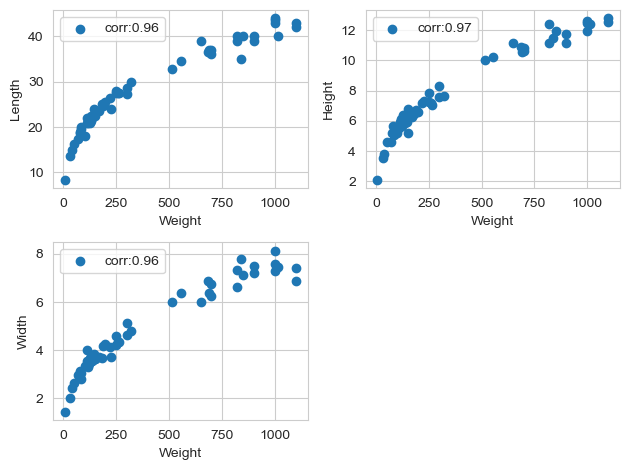

In [18]:
print_feature(2,2,perchDF,perchDF.columns[0],perchDF.columns[1:],corrList[1:])

[3] 학습 진행 <hr>


In [ ]:
poly = PolynomialFeatures(include_bias=False)


In [19]:
perchDF

,Weight,Length,Height,Width
0,5.9,8.4,2.1120,1.4080
1,32.0,13.7,3.5280,1.9992
2,40.0,15.0,3.8240,2.4320
3,51.5,16.2,4.5924,2.6316
4,70.0,17.4,4.5880,2.9415
5,100.0,18.0,5.2224,3.3216
6,78.0,18.7,5.1992,3.1234
7,80.0,19.0,5.6358,3.0502
8,85.0,19.6,5.1376,3.0368
9,85.0,20.0,5.0820,2.7720


In [23]:
targetDF = perchDF['Weight']
featrueDF=perchDF[perchDF.columns[1:4]]

,Length,Height,Width
0,8.4,2.1120,1.4080
1,13.7,3.5280,1.9992
2,15.0,3.8240,2.4320
3,16.2,4.5924,2.6316
4,17.4,4.5880,2.9415
5,18.0,5.2224,3.3216
6,18.7,5.1992,3.1234
7,19.0,5.6358,3.0502
8,19.6,5.1376,3.0368
9,20.0,5.0820,2.7720
